In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv('Gaussian_noise.csv')
data.head()

,-0.27867,8.0518
0,-0.30433,8.0548
1,1.46620,7.8829
2,1.00430,7.9805
3,0.26019,8.0100
4,0.97867,7.9829


### Using Only 20 data for the training

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt


In [9]:

#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,shuffle=True)

In [10]:
sample_data = data.iloc[0:20,:]
X= sample_data.iloc[:,:1]
Y = sample_data.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,)
list_rmse_train=[]
list_rmse_test=[]
list_r2_train=[]
list_r2_test=[]

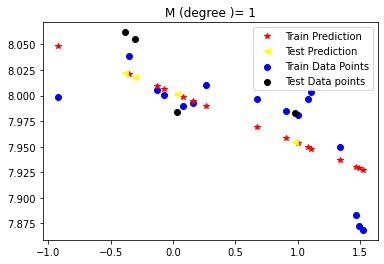

Root mean square error on training data =  0.03528536524504903
R2 Score of train data= 0.5109855114426907
Root mean square error on test data =  0.03185906052957544
R2 Score of test data= 0.2766674043161014
-------------------------------------------------------------------------------------------


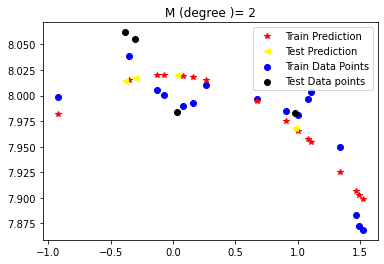

Root mean square error on training data =  0.0253700793410878
R2 Score of train data= 0.7472005394042054
Root mean square error on test data =  0.035930051771845974
R2 Score of test data= 0.0800000745941124
-------------------------------------------------------------------------------------------


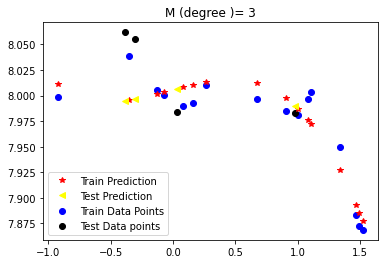

Root mean square error on training data =  0.018397031427862233
R2 Score of train data= 0.8670684732828242
Root mean square error on test data =  0.04581689128805236
R2 Score of test data= -0.4959715814317025
-------------------------------------------------------------------------------------------


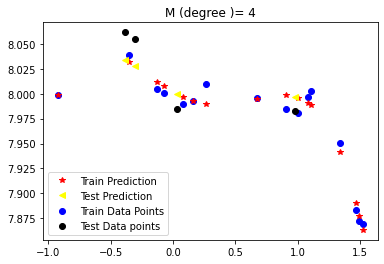

Root mean square error on training data =  0.009619449586991242
R2 Score of train data= 0.9636559820727038
Root mean square error on test data =  0.022323663658835004
R2 Score of test data= 0.6448571731119441
-------------------------------------------------------------------------------------------


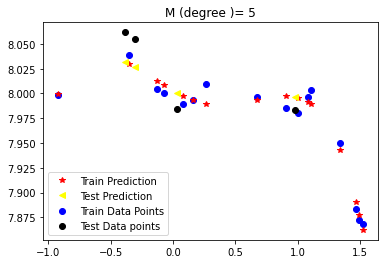

Root mean square error on training data =  0.009588118347552287
R2 Score of train data= 0.9638923466793403
Root mean square error on test data =  0.023244924938966606
R2 Score of test data= 0.6149400036126065
-------------------------------------------------------------------------------------------


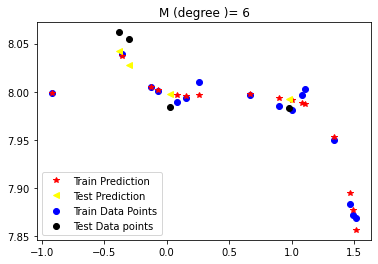

Root mean square error on training data =  0.008155145744599187
R2 Score of train data= 0.9738786302924877
Root mean square error on test data =  0.018256059438650666
R2 Score of test data= 0.7624876545871834
-------------------------------------------------------------------------------------------


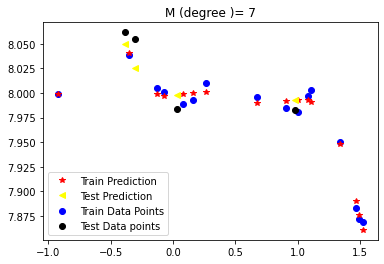

Root mean square error on training data =  0.0070826421381900186
R2 Score of train data= 0.9802974204357024
Root mean square error on test data =  0.017752200068245877
R2 Score of test data= 0.7754172095207127
-------------------------------------------------------------------------------------------


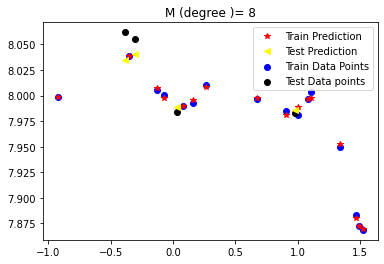

Root mean square error on training data =  0.002960570416000049
R2 Score of train data= 0.9965574260172729
Root mean square error on test data =  0.015732027115623767
R2 Score of test data= 0.8236231919612269
-------------------------------------------------------------------------------------------


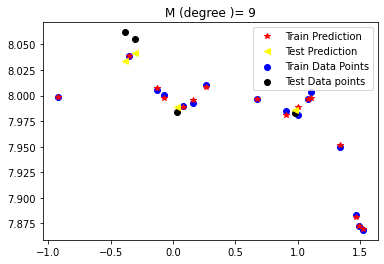

Root mean square error on training data =  0.002950933932123453
R2 Score of train data= 0.9965798002991211
Root mean square error on test data =  0.015941239381175667
R2 Score of test data= 0.8189009079462315
-------------------------------------------------------------------------------------------


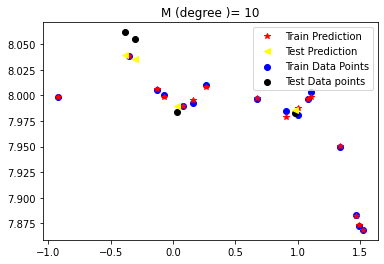

Root mean square error on training data =  0.002856738876142337
R2 Score of train data= 0.996794663846614
Root mean square error on test data =  0.015005755802663579
R2 Score of test data= 0.8395322159082989
-------------------------------------------------------------------------------------------


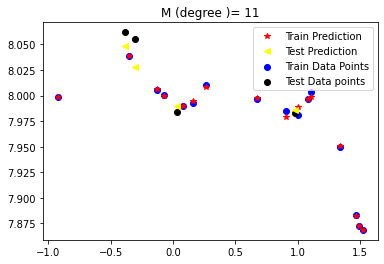

Root mean square error on training data =  0.0028395516101403485
R2 Score of train data= 0.9968331169520643
Root mean square error on test data =  0.015430805113532564
R2 Score of test data= 0.8303127236984942
-------------------------------------------------------------------------------------------


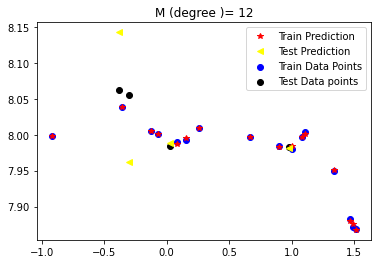

Root mean square error on training data =  0.0018884131268952148
R2 Score of train data= 0.9985993600369817
Root mean square error on test data =  0.06174749309631762
R2 Score of test data= -1.717132184116561
-------------------------------------------------------------------------------------------


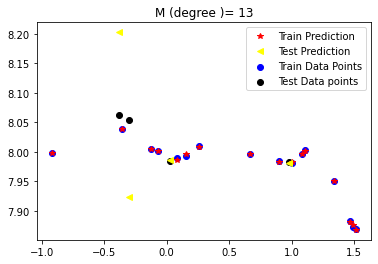

Root mean square error on training data =  0.0018402788965088245
R2 Score of train data= 0.9986698525572896
Root mean square error on test data =  0.09628998796246996
R2 Score of test data= -5.607457387681976
-------------------------------------------------------------------------------------------


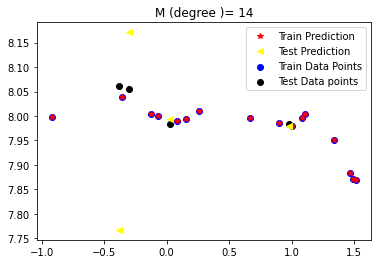

Root mean square error on training data =  5.831259451678394e-05
R2 Score of train data= 0.9999986644590089
Root mean square error on test data =  0.15850708932590943
R2 Score of test data= -16.904800580855408
-------------------------------------------------------------------------------------------


In [11]:
for i in range(1,15):
  poly_features = PolynomialFeatures(degree=i,include_bias=False)
  X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,Y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)
  list_rmse_train.append( rmse_train)
  list_rmse_test.append(rmse_test)
  list_r2_train.append(r2_train)
  list_r2_test.append(r2_test)
  plt.scatter(X_train,Y_train,color='blue',label='Train Data Points')
  plt.scatter(X_test,Y_test,color='black',label ='Test Data points')

  plt.plot(X_train,y_train_predict,'*',color='r',label='Train Prediction')
  plt.plot(X_test,y_test_predict,'<',color='yellow',label='Test Prediction')
  plt.legend()
  plt.title('M (degree )= {}'.format(i))
  plt.show()
  print("Root mean square error on training data = ",rmse_train)
  print('R2 Score of train data=',r2_train)
  print("Root mean square error on test data = ",rmse_test)
  print('R2 Score of test data=',r2_test)
  print('-------------------------------------------------------------------------------------------')


  

# Observation

The optimal value of M is 8 because it ahs highest test accuracy on both test and training data set. and minimum test and train error(Mean Square Error)

Yes I can distinguish between under fitting , over fitting and Good fitting. The above score of R2 on train and test dataset explain it all.
Where the value of R2_score on test data set is less that 0.5(50%) are considered as underfit (for M<8).

For M>8 the the score on train dataset is near to 1 but R2 score on test data starts to decrease . This implies that the the model start for overfit for M>8 

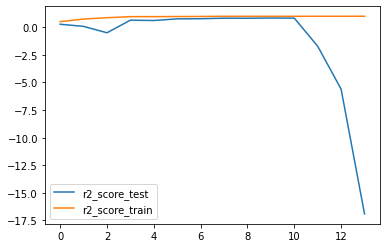

In [12]:
plt.plot(list_r2_test,label='r2_score_test')
plt.plot(list_r2_train,label='r2_score_train')


plt.legend()
plt.show()

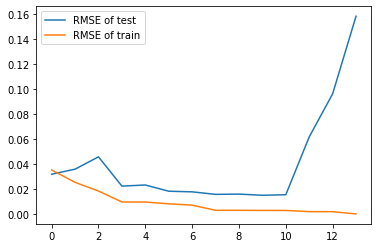

In [13]:
plt.plot(list_rmse_test,label ='RMSE of test')
plt.plot(list_rmse_train,label ='RMSE of train')
plt.legend()
plt.show()

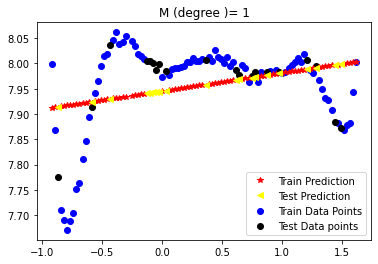

Root mean square error on training data =  0.08654234520275719
R2 Score of train data= 0.08949327633733617
Root mean square error on test data =  0.06349023271658168
R2 Score of test data= -0.12940465370919374
-------------------------------------------------------------------------------------------


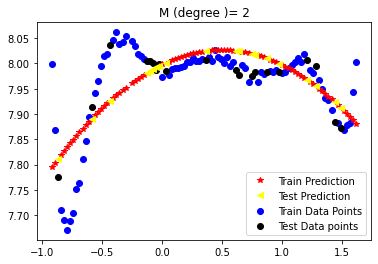

Root mean square error on training data =  0.0643300304343424
R2 Score of train data= 0.4969011193314187
Root mean square error on test data =  0.03848497899136046
R2 Score of test data= 0.5850285267248683
-------------------------------------------------------------------------------------------


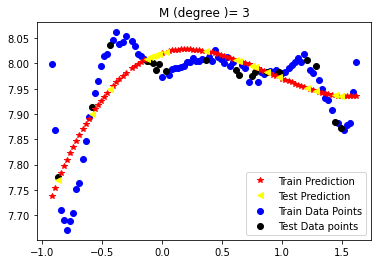

Root mean square error on training data =  0.06009086034477946
R2 Score of train data= 0.5610220749093323
Root mean square error on test data =  0.035757346197186866
R2 Score of test data= 0.6417664196536359
-------------------------------------------------------------------------------------------


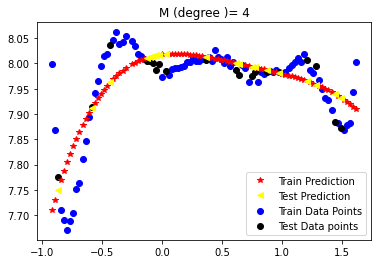

Root mean square error on training data =  0.05910613514597875
R2 Score of train data= 0.5752914908512348
Root mean square error on test data =  0.031460819961202514
R2 Score of test data= 0.7226834364417083
-------------------------------------------------------------------------------------------


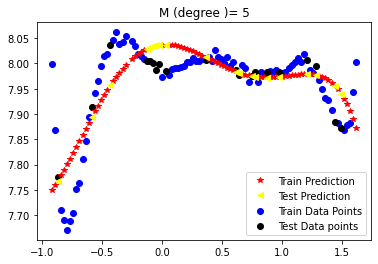

Root mean square error on training data =  0.057246556557393365
R2 Score of train data= 0.6015951888175171
Root mean square error on test data =  0.036861910119998585
R2 Score of test data= 0.6192925226432757
-------------------------------------------------------------------------------------------


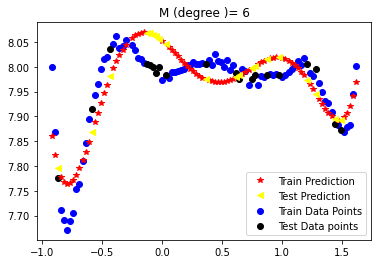

Root mean square error on training data =  0.042107727618717235
R2 Score of train data= 0.7844492951806696
Root mean square error on test data =  0.04425449740190727
R2 Score of test data= 0.4512802895193141
-------------------------------------------------------------------------------------------


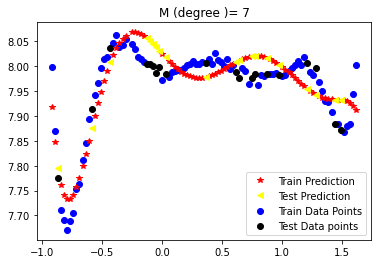

Root mean square error on training data =  0.035359648197898996
R2 Score of train data= 0.8480006578741982
Root mean square error on test data =  0.0405482665894823
R2 Score of test data= 0.5393401929549402
-------------------------------------------------------------------------------------------


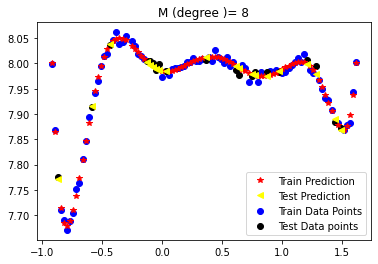

Root mean square error on training data =  0.006957896660464867
R2 Score of train data= 0.994114521386983
Root mean square error on test data =  0.007440997531605186
R2 Score of test data= 0.9844869191480016
-------------------------------------------------------------------------------------------


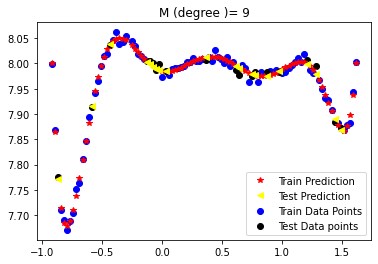

Root mean square error on training data =  0.006956229342198542
R2 Score of train data= 0.994117341719258
Root mean square error on test data =  0.0074335984217595375
R2 Score of test data= 0.9845177553148894
-------------------------------------------------------------------------------------------


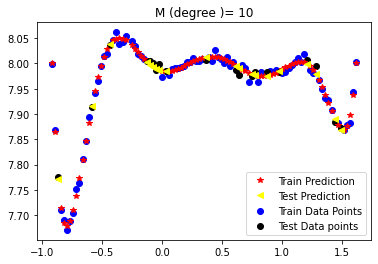

Root mean square error on training data =  0.006955271023456244
R2 Score of train data= 0.9941189624459729
Root mean square error on test data =  0.0074617568054793455
R2 Score of test data= 0.9844002400394881
-------------------------------------------------------------------------------------------


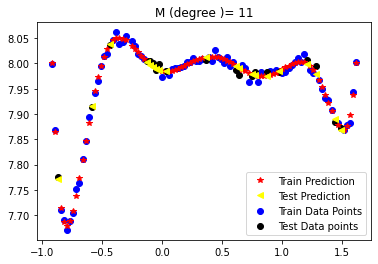

Root mean square error on training data =  0.006953705406075569
R2 Score of train data= 0.9941216097672032
Root mean square error on test data =  0.007474251112831631
R2 Score of test data= 0.9843479543962385
-------------------------------------------------------------------------------------------


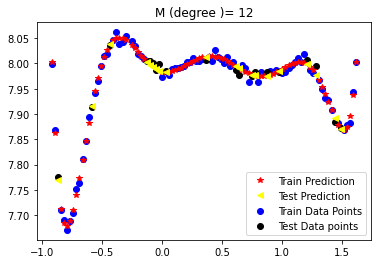

Root mean square error on training data =  0.0069123064395088946
R2 Score of train data= 0.9941913955419465
Root mean square error on test data =  0.007767983694456329
R2 Score of test data= 0.98309355306846
-------------------------------------------------------------------------------------------


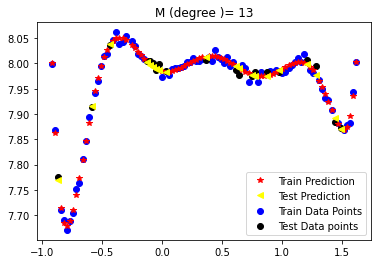

Root mean square error on training data =  0.006908160961610696
R2 Score of train data= 0.9941983605748478
Root mean square error on test data =  0.007761421065454989
R2 Score of test data= 0.9831221071633255
-------------------------------------------------------------------------------------------


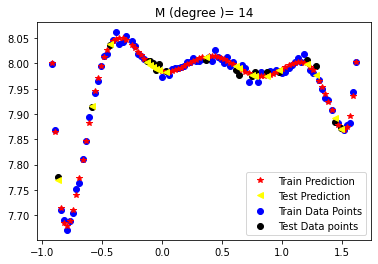

Root mean square error on training data =  0.006907608081439808
R2 Score of train data= 0.9941992891817686
Root mean square error on test data =  0.007725535159853576
R2 Score of test data= 0.9832778204660146
-------------------------------------------------------------------------------------------


In [14]:
sample_data = data.iloc[:,:20]
X= sample_data.iloc[:,:1]
Y = sample_data.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,)
list_rmse_train=[]
list_rmse_test=[]
list_r2_train=[]
list_r2_test=[]


for i in range(1,15):
  poly_features = PolynomialFeatures(degree=i,include_bias=True)
  X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,Y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)
  list_rmse_train.append( rmse_train)
  list_rmse_test.append(rmse_test)
  list_r2_train.append(r2_train)
  list_r2_test.append(r2_test)
  plt.scatter(X_train,Y_train,color='blue',label='Train Data Points')
  plt.scatter(X_test,Y_test,color='black',label ='Test Data points')

  plt.plot(X_train,y_train_predict,'*',color='r',label='Train Prediction')
  plt.plot(X_test,y_test_predict,'<',color='yellow',label='Test Prediction')
  plt.legend()
  plt.title('M (degree )= {}'.format(i))
  plt.show()
  print("Root mean square error on training data = ",rmse_train)
  print('R2 Score of train data=',r2_train)
  print("Root mean square error on test data = ",rmse_test)
  print('R2 Score of test data=',r2_test)
  print('-------------------------------------------------------------------------------------------')

0.5850285267248683
--------------------------------------------------------------------------------------------
1 : -99.59490249191138
2 : -98.32724068315908
3 : -97.12707244501159
4 : -95.98955444825194
5 : -94.91027529079233
6 : -93.88520980276908
7 : -92.91067891401042
8 : -91.98331432148333
0.6006094791725897
---------------------------------------------------------------------------------------------
1 : -60.73328594476045
2 : -60.73328594476045
3 : -60.73328594476045
4 : -60.73328594476045
5 : -60.73328594476045
6 : -60.73328594476045
7 : -60.73328594476045
8 : -60.73328594476045
-0.030487393820068487
Linear Regreesion : 0.5850285267248683
Ridge Regreesion : 0.6006094791725897
Lasso Regression : -0.030487393820068487


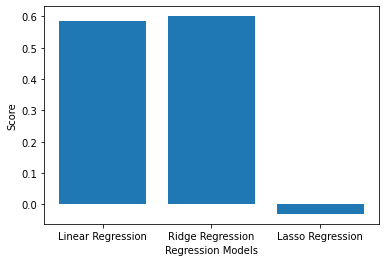

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

poly_features = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
# Bulding and fitting the Linear Regression model 
linearModel = LinearRegression() 
linearModel.fit(X_train_poly, Y_train) 
  
# Evaluating the Linear Regression model 
print(linearModel.score((poly_features.fit_transform(X_test)), Y_test)) 

print('--------------------------------------------------------------------------------------------')
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i  ) 
    ridgeModel.fit(X_train_poly, Y_train) 
    scores = cross_val_score(ridgeModel, X,Y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i ) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 2) 
ridgeModelChosen.fit(X_train_poly, Y_train) 
  
# Evaluating the Ridge Regression model 
print(ridgeModelChosen.score((poly_features.fit_transform(X_test)), Y_test)) 

print('---------------------------------------------------------------------------------------------')
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train_poly, Y_train) 
    scores = cross_val_score(lassoModel, X, Y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925) 
lassoModelChosen.fit(X_train_poly, Y_train) 
  
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score((poly_features.fit_transform(X_test)), Y_test)) 
# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [linearModel.score((poly_features.fit_transform(X_test)), Y_test), 
         ridgeModelChosen.score((poly_features.fit_transform(X_test)), Y_test), 
         lassoModelChosen.score((poly_features.fit_transform(X_test)), Y_test)] 
  
# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score((poly_features.fit_transform(X_test)), Y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score((poly_features.fit_transform(X_test)), Y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score((poly_features.fit_transform(X_test)), Y_test) 
  
# Printing the scores for different models 
for key, val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 

# Using  all 100 datapoints points

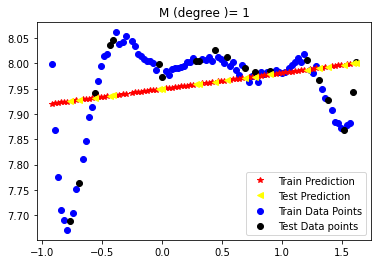

Root mean square error on training data =  0.08167356381983007
R2 Score of train data= 0.073329547466075
Root mean square error on test data =  0.08483251774140757
R2 Score of test data= 0.0669281110732064
-------------------------------------------------------------------------------------------


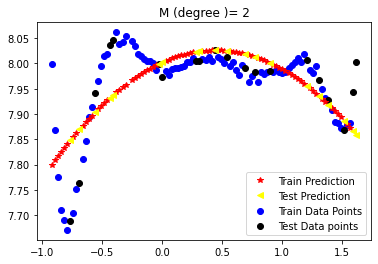

Root mean square error on training data =  0.05796197880463964
R2 Score of train data= 0.5332882765824245
Root mean square error on test data =  0.06883594527245894
R2 Score of test data= 0.3856427984231925
-------------------------------------------------------------------------------------------


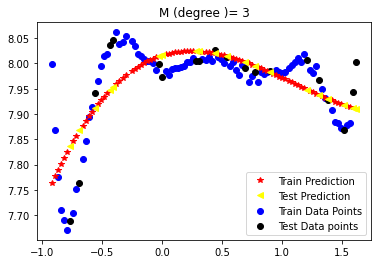

Root mean square error on training data =  0.05571755805353929
R2 Score of train data= 0.568732778156456
Root mean square error on test data =  0.058756199635141115
R2 Score of test data= 0.5523920538297371
-------------------------------------------------------------------------------------------


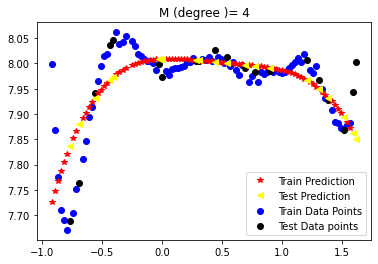

Root mean square error on training data =  0.05353427723447608
R2 Score of train data= 0.6018688210175938
Root mean square error on test data =  0.06336077500523209
R2 Score of test data= 0.4794872719787009
-------------------------------------------------------------------------------------------


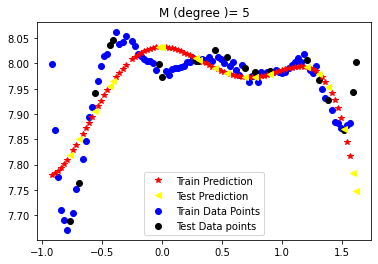

Root mean square error on training data =  0.049220276457508434
R2 Score of train data= 0.6634493760480831
Root mean square error on test data =  0.08297744798828482
R2 Score of test data= 0.10728971211416738
-------------------------------------------------------------------------------------------


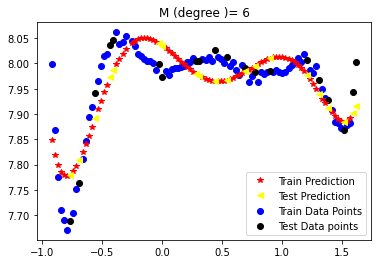

Root mean square error on training data =  0.041098992910016695
R2 Score of train data= 0.7653477824686986
Root mean square error on test data =  0.04772570397021759
R2 Score of test data= 0.7046784912890506
-------------------------------------------------------------------------------------------


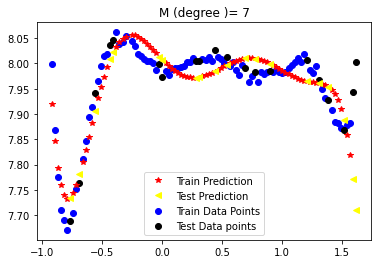

Root mean square error on training data =  0.030835016109881208
R2 Score of train data= 0.8679158632998216
Root mean square error on test data =  0.08068344229503836
R2 Score of test data= 0.15596738332344307
-------------------------------------------------------------------------------------------


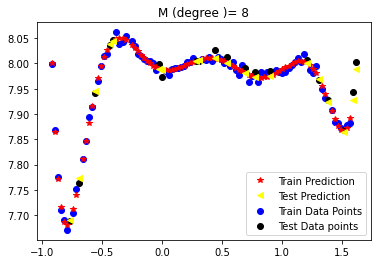

Root mean square error on training data =  0.006776330484332891
R2 Score of train data= 0.9936210167793258
Root mean square error on test data =  0.009041874277201323
R2 Score of test data= 0.9893999644835509
-------------------------------------------------------------------------------------------


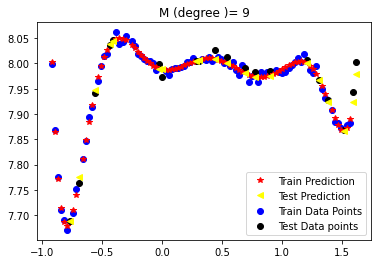

Root mean square error on training data =  0.00672586885790995
R2 Score of train data= 0.9937156684016748
Root mean square error on test data =  0.010607499925513306
R2 Score of test data= 0.9854113042526078
-------------------------------------------------------------------------------------------


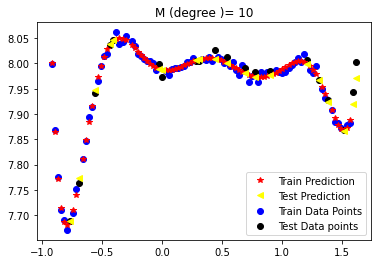

Root mean square error on training data =  0.006712499911328827
R2 Score of train data= 0.9937406261870259
Root mean square error on test data =  0.01170769103589628
R2 Score of test data= 0.9822281393959896
-------------------------------------------------------------------------------------------


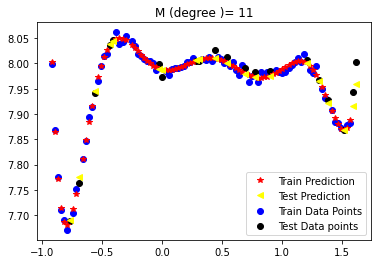

Root mean square error on training data =  0.006689002086925247
R2 Score of train data= 0.9937843726990898
Root mean square error on test data =  0.013922797267798902
R2 Score of test data= 0.9748670544162594
-------------------------------------------------------------------------------------------


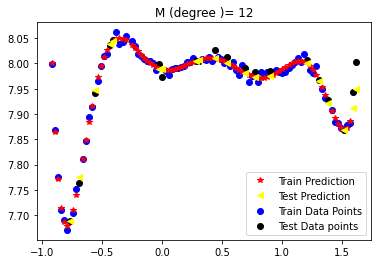

Root mean square error on training data =  0.006681517042658712
R2 Score of train data= 0.993798275584571
Root mean square error on test data =  0.015773525059903804
R2 Score of test data= 0.9677412219517577
-------------------------------------------------------------------------------------------


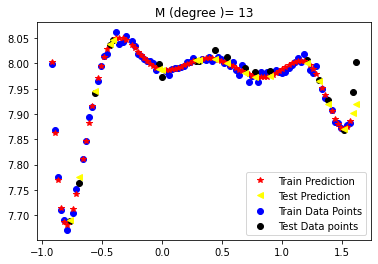

Root mean square error on training data =  0.006636651983257895
R2 Score of train data= 0.9938812826522448
Root mean square error on test data =  0.022358238707987838
R2 Score of test data= 0.9351864858294948
-------------------------------------------------------------------------------------------


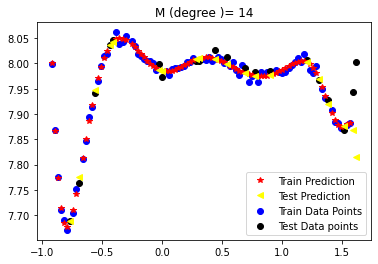

Root mean square error on training data =  0.006339945184828773
R2 Score of train data= 0.9944161555876531
Root mean square error on test data =  0.046095273373343244
R2 Score of test data= 0.7245116853685039
-------------------------------------------------------------------------------------------


In [16]:
sample_data = data
X= sample_data.iloc[:,:1]
Y = sample_data.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,)
list_rmse_train=[]
list_rmse_test=[]
list_r2_train=[]
list_r2_test=[]


for i in range(1,15):
  poly_features = PolynomialFeatures(degree=i,include_bias=False)
  X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,Y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)
  list_rmse_train.append( rmse_train)
  list_rmse_test.append(rmse_test)
  list_r2_train.append(r2_train)
  list_r2_test.append(r2_test)
  plt.scatter(X_train,Y_train,color='blue',label='Train Data Points')
  plt.scatter(X_test,Y_test,color='black',label ='Test Data points')

  plt.plot(X_train,y_train_predict,'*',color='r',label='Train Prediction')
  plt.plot(X_test,y_test_predict,'<',color='yellow',label='Test Prediction')
  plt.legend()
  plt.title('M (degree )= {}'.format(i))
  plt.show()
  print("Root mean square error on training data = ",rmse_train)
  print('R2 Score of train data=',r2_train)
  print("Root mean square error on test data = ",rmse_test)
  print('R2 Score of test data=',r2_test)
  print('-------------------------------------------------------------------------------------------')

## Diffrence between using 20 and 100 data points
The optimal fit is at M == 8. The difference between using 20 and 100 data points is that the R2 score is increased and Root mean error is decresed . that means the model predict more correctly.

## Underlying Polynomial


In [17]:
poly_features = PolynomialFeatures(degree=8,include_bias=True)
X_train_poly  = poly_features.fit_transform(X_train.to_numpy())

p1 = np.poly1d(X_train_poly[2]) 
print(p1)

   8          7           6          5             4             3
1 x - 0.1504 x + 0.02261 x - 0.0034 x + 0.0005113 x - 7.688e-05 x
              2
 + 1.156e-05 x - 1.738e-06 x + 2.614e-07


# Part 1B

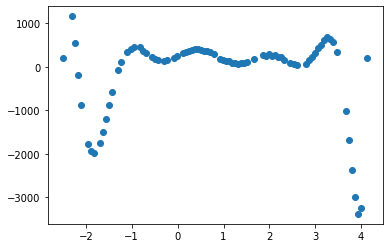

In [18]:
data = pd.read_csv('NonGaussian_noise.csv')
X = data.iloc[:,:1]
Y = data.iloc[:,1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,shuffle=True)
plt.scatter(X_train,Y_train)

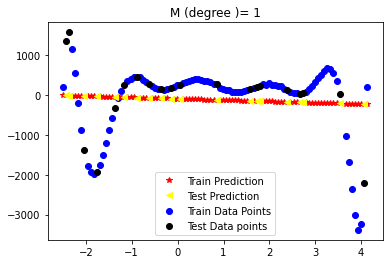

Root mean square error on training data =  913.0761622781407
R2 Score of train data= 0.0048871882709179415
Root mean square error on test data =  874.3487314371898
R2 Score of test data= 0.019871432380441423
-------------------------------------------------------------------------------------------


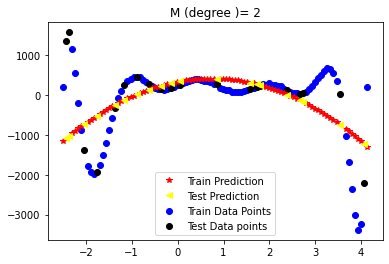

Root mean square error on training data =  771.2720062394861
R2 Score of train data= 0.2899753188819991
Root mean square error on test data =  926.1855183921186
R2 Score of test data= -0.09978970886441263
-------------------------------------------------------------------------------------------


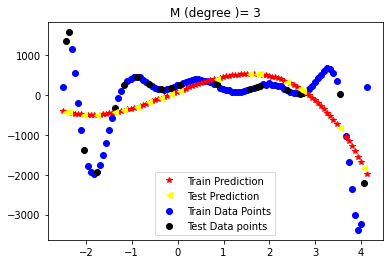

Root mean square error on training data =  722.9519551482239
R2 Score of train data= 0.3761543067891526
Root mean square error on test data =  792.5023417677177
R2 Score of test data= 0.1947795658009287
-------------------------------------------------------------------------------------------


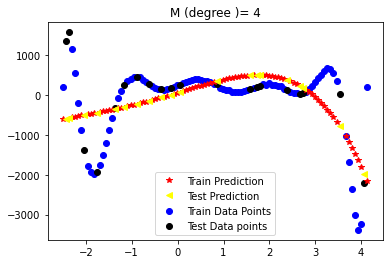

Root mean square error on training data =  719.8645151002011
R2 Score of train data= 0.3814713223656446
Root mean square error on test data =  823.22591447914
R2 Score of test data= 0.13113611553836213
-------------------------------------------------------------------------------------------


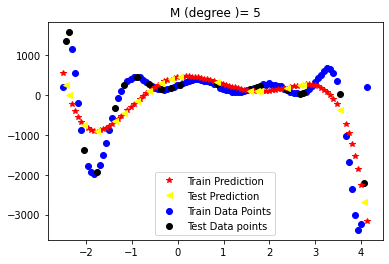

Root mean square error on training data =  633.7529163854297
R2 Score of train data= 0.5205997569952578
Root mean square error on test data =  582.8062030259491
R2 Score of test data= 0.5645262210423228
-------------------------------------------------------------------------------------------


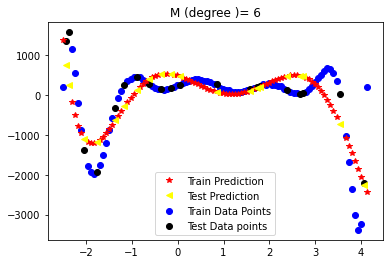

Root mean square error on training data =  585.6207884110676
R2 Score of train data= 0.5906533147374673
Root mean square error on test data =  482.88780520309257
R2 Score of test data= 0.7010447703612708
-------------------------------------------------------------------------------------------


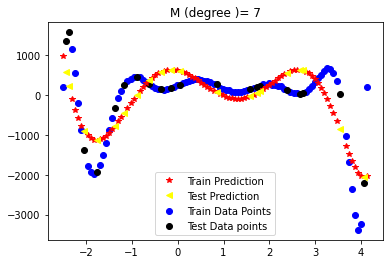

Root mean square error on training data =  571.7723656434345
R2 Score of train data= 0.6097843966233418
Root mean square error on test data =  571.3086320865675
R2 Score of test data= 0.5815387469855646
-------------------------------------------------------------------------------------------


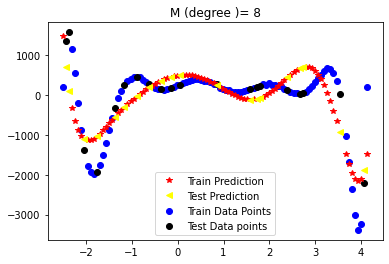

Root mean square error on training data =  541.142635588734
R2 Score of train data= 0.6504721278328337
Root mean square error on test data =  565.4455017153073
R2 Score of test data= 0.5900837018387352
-------------------------------------------------------------------------------------------


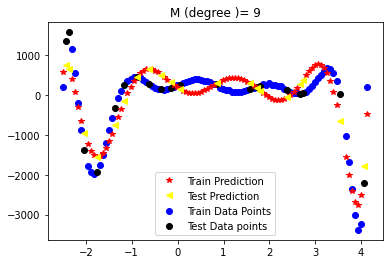

Root mean square error on training data =  348.2929223009514
R2 Score of train data= 0.8552069866479799
Root mean square error on test data =  390.61508059013653
R2 Score of test data= 0.8043807040322943
-------------------------------------------------------------------------------------------


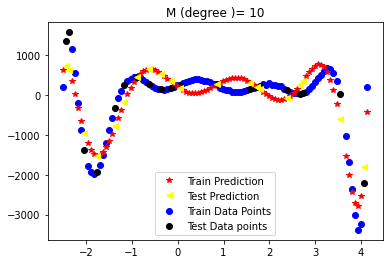

Root mean square error on training data =  347.63813264836455
R2 Score of train data= 0.8557508957575699
Root mean square error on test data =  397.8590862543204
R2 Score of test data= 0.7970578575556448
-------------------------------------------------------------------------------------------


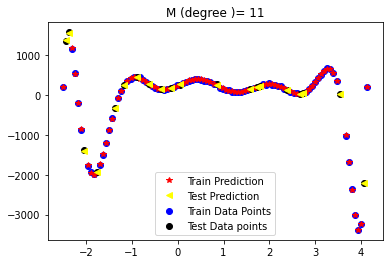

Root mean square error on training data =  12.991811550080792
R2 Score of train data= 0.9997985358699332
Root mean square error on test data =  11.07876746002977
R2 Score of test data= 0.9998426391935368
-------------------------------------------------------------------------------------------


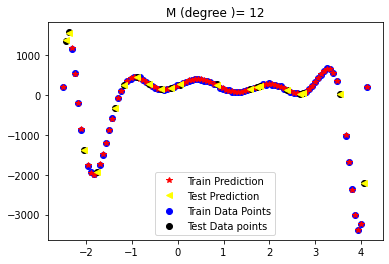

Root mean square error on training data =  12.984480157763448
R2 Score of train data= 0.9997987631817017
Root mean square error on test data =  10.933961295179556
R2 Score of test data= 0.9998467259109923
-------------------------------------------------------------------------------------------


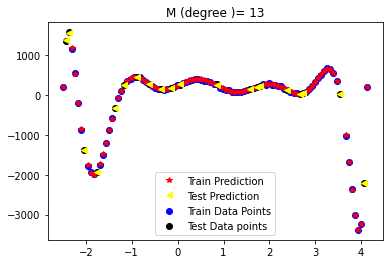

Root mean square error on training data =  12.96753891016425
R2 Score of train data= 0.9997992879587706
Root mean square error on test data =  10.703160878973947
R2 Score of test data= 0.9998531284136014
-------------------------------------------------------------------------------------------


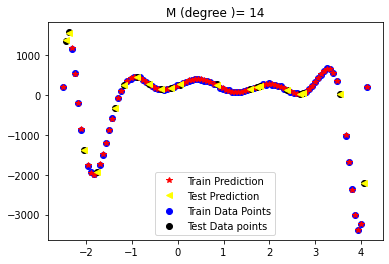

Root mean square error on training data =  12.939752027912181
R2 Score of train data= 0.9998001472099385
Root mean square error on test data =  10.930514574784743
R2 Score of test data= 0.9998468225291616
-------------------------------------------------------------------------------------------


In [19]:

list_rmse_train=[]
list_rmse_test=[]
list_r2_train=[]
list_r2_test=[]


for i in range(1,15):
  poly_features = PolynomialFeatures(degree=i,include_bias=False)
  X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,Y_train)
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)
  list_rmse_train.append( rmse_train)
  list_rmse_test.append(rmse_test)
  list_r2_train.append(r2_train)
  list_r2_test.append(r2_test)
  plt.scatter(X_train,Y_train,color='blue',label='Train Data Points')
  plt.scatter(X_test,Y_test,color='black',label ='Test Data points')

  plt.plot(X_train,y_train_predict,'*',color='r',label='Train Prediction')
  plt.plot(X_test,y_test_predict,'<',color='yellow',label='Test Prediction')
  plt.legend()
  plt.title('M (degree )= {}'.format(i))
  plt.show()
  print("Root mean square error on training data = ",rmse_train)
  print('R2 Score of train data=',r2_train)
  print("Root mean square error on test data = ",rmse_test)
  print('R2 Score of test data=',r2_test)
  print('-------------------------------------------------------------------------------------------')

# Question 2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


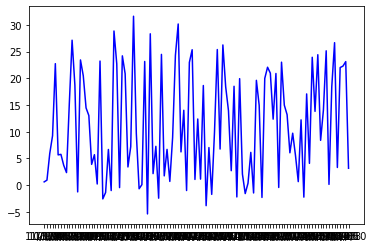

In [122]:
# reading Testing and Training Data
train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv')

# Ploting the training data set
plt.plot(train_data.id, train_data.value,color='blue')

# converting Human readable Date string to UNIX timestamp
import time
import datetime
index = 0
for i in train_data.id:
  train_data.id[index] = time.mktime(datetime.datetime.strptime(i, "%m/%d/%y").
                                     timetuple())
  train_data.id[index] =  int(train_data.id[index])
  index+=1

X_train,X_test,Y_train,Y_test = train_test_split(train_data.id,train_data.value,test_size= 0.2,shuffle=True)


In [126]:
""" 
Args:
    This funtion takes 5 agrument.
    x : list of data points
    a,b,c,d : parameters

return:
    List containing sin value corresponding to the list x

"""
import math
def basis_func (x,a,b,c,d):
  output =[]
  for item in x:
    output.append(a*np.sin((item*b)+c)+d)
  return output
import datetime

In [127]:
# generating point between 2004 and 2015 in UNIX timeStamp

points= np.arange(1100715500,1415878400,100000)

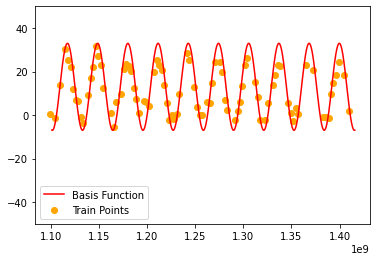

In [128]:
y = basis_func(points,20,0.0000002,180.3,13)
plt.plot(points,y,color='red',label='Basis Function')
plt.scatter(X_train,Y_train,color='orange',label ='Train Points')
plt.legend()
plt.ylim(-50,50)
plt.show()

## Observation

In this part instead of writing a loop to fit the function to the data points. I Chose the value of a,b,c,d manually.


*  'a'  determine the amplitude of the sine curse
*  'b' control the value which is actually fed to sine function
*  'c' is the initial Phase angle
*  'd' shifts the sin curse Up and Down (+ve move upwards)



## Tunning Parameter a

In [ ]:
arr = np.arange(13,21,0.1)
y=[]
for num in arr:
  
  y_train_predict=basis_func(X_train,num,0.0000002,180.3,13)
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  y_test_predict = basis_func(X_test,num,0.0000002,180.3,13)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)

  print('a =',num)
  print("RMSE on train data =",rmse_train)
  print('R2 score on train =',r2_train)
  print("RMSE on test data =",rmse_test)
  print('R2 score on test =',r2_test) 
  print('------------------------------------------------------------------------------------------')


 From the observation from the above we can say that optimal value of a is 14.4 because it has the highest R2 score on both test and trianing set and least RMSE on testing and training set

## Optimizing for b

array([1.00e-09, 1.10e-08, 2.10e-08, 3.10e-08, 4.10e-08, 5.10e-08,
       6.10e-08, 7.10e-08, 8.10e-08, 9.10e-08, 1.01e-07, 1.11e-07,
       1.21e-07, 1.31e-07, 1.41e-07, 1.51e-07, 1.61e-07, 1.71e-07,
       1.81e-07, 1.91e-07, 2.01e-07, 2.11e-07, 2.21e-07, 2.31e-07,
       2.41e-07, 2.51e-07, 2.61e-07, 2.71e-07, 2.81e-07, 2.91e-07,
       3.01e-07, 3.11e-07, 3.21e-07, 3.31e-07, 3.41e-07, 3.51e-07,
       3.61e-07, 3.71e-07, 3.81e-07, 3.91e-07, 4.01e-07, 4.11e-07,
       4.21e-07, 4.31e-07, 4.41e-07, 4.51e-07, 4.61e-07, 4.71e-07,
       4.81e-07, 4.91e-07, 5.01e-07, 5.11e-07, 5.21e-07, 5.31e-07,
       5.41e-07, 5.51e-07, 5.61e-07, 5.71e-07, 5.81e-07, 5.91e-07,
       6.01e-07, 6.11e-07, 6.21e-07, 6.31e-07, 6.41e-07, 6.51e-07,
       6.61e-07, 6.71e-07, 6.81e-07, 6.91e-07, 7.01e-07, 7.11e-07,
       7.21e-07, 7.31e-07, 7.41e-07, 7.51e-07, 7.61e-07, 7.71e-07,
       7.81e-07, 7.91e-07, 8.01e-07, 8.11e-07, 8.21e-07, 8.31e-07,
       8.41e-07, 8.51e-07, 8.61e-07, 8.71e-07, 8.81e-07, 8.91e

In [143]:
arr = np.arange(0.00000001,0.000001,0.000000001)
y=[]
for num in arr:
  
  y_train_predict=basis_func(X_train,14.4,num,180.3,13)
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  y_test_predict = basis_func(X_test,14.4,num,180.3,13)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)

  print('b =',num)
  print("RMSE on train data =",rmse_train)
  print('R2 score on train =',r2_train)
  print("RMSE on test data =",rmse_test)
  print('R2 score on test =',r2_test) 
  print('------------------------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
------------------------------------------------------------------------------------------
b = 1.670000000000001e-07
RMSE on train data = 13.106652063896187
R2 score on train = -0.6922411117318512
RMSE on test data = 13.238771860521508
R2 score on test = -0.6932318976531173
------------------------------------------------------------------------------------------
b = 1.6800000000000013e-07
RMSE on train data = 13.152064546877364
R2 score on train = -0.7039881246107578
RMSE on test data = 13.524879280972472
R2 score on test = -0.767208695232585
------------------------------------------------------------------------------------------
b = 1.6900000000000012e-07
RMSE on train data = 14.93009728131737
R2 score on train = -1.1958566019306298
RMSE on test data = 15.4209696003174
R2 score on test = -1.2974412104340458
------------------------------------------------------------------------------------------
b = 1.7000000000000012e-07
RMSE on 

From the above observation we can see that optimal value of b is 0.0000002

##Optimizing for C

In [149]:
arr = np.arange(349,351,0.01)
y=[]
for num in arr:
  
  y_train_predict=basis_func(X_train,14.4,0.0000002,num,13)
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  y_test_predict = basis_func(X_test,14.4,0.0000002,num,13)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)

  print('c =',num)
  print("RMSE on train data =",rmse_train)
  print('R2 score on train =',r2_train)
  print("RMSE on test data =",rmse_test)
  print('R2 score on test =',r2_test) 
  print('------------------------------------------------------------------------------------------')

c = 349.0
RMSE on train data = 10.28995040953184
R2 score on train = -0.04305032826561428
RMSE on test data = 10.683524532943101
R2 score on test = -0.10268165189309819
------------------------------------------------------------------------------------------
c = 349.01
RMSE on train data = 10.208975139869406
R2 score on train = -0.02669865496055923
RMSE on test data = 10.5918158119781
R2 score on test = -0.08383178891100451
------------------------------------------------------------------------------------------
c = 349.02
RMSE on train data = 10.127868830328243
R2 score on train = -0.01045001940202317
RMSE on test data = 10.499913046878989
R2 score on test = -0.06510506520723958
------------------------------------------------------------------------------------------
c = 349.03
RMSE on train data = 10.046635886959585
R2 score on train = 0.005694078099110378
RMSE on test data = 10.407822947110843
R2 score on test = -0.04650386376763671
-----------------------------------------------

Optimal valure of c is 349.9899999999991

In [153]:
arr = np.arange(12,12.3,0.01)
y=[]
for num in arr:
  
  y_train_predict=basis_func(X_train,14.4,0.0000002,349.9899999999991,num)
  rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
  r2_train = r2_score(Y_train,y_train_predict)
  y_test_predict = basis_func(X_test,14.4,0.0000002,349.9899999999991,num)
  rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
  r2_test = r2_score(Y_test,y_test_predict)

  print('d =',num)
  print("RMSE on train data =",rmse_train)
  print('R2 score on train =',r2_train)
  print("RMSE on test data =",rmse_test)
  print('R2 score on test =',r2_test) 
  print('------------------------------------------------------------------------------------------')

d = 12.0
RMSE on train data = 2.976901675755414
R2 score on train = 0.9127013190651633
RMSE on test data = 3.0693997700558424
R2 score on test = 0.908981859756757
------------------------------------------------------------------------------------------
d = 12.01
RMSE on train data = 2.979690510794667
R2 score on train = 0.9125376753259791
RMSE on test data = 3.0687876655935105
R2 score on test = 0.9090181580944269
------------------------------------------------------------------------------------------
d = 12.02
RMSE on train data = 2.9825102670609827
R2 score on train = 0.9123720613941373
RMSE on test data = 3.068208031502896
R2 score on test = 0.9090525242367112
------------------------------------------------------------------------------------------
d = 12.03
RMSE on train data = 2.985360856936489
R2 score on train = 0.912204477269638
RMSE on test data = 3.067660886189816
R2 score on test = 0.90908495818361
-------------------------------------------------------------------------

 Optimal value of d=12.189999999999996





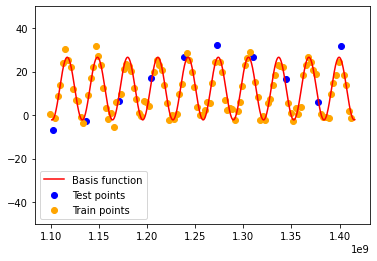

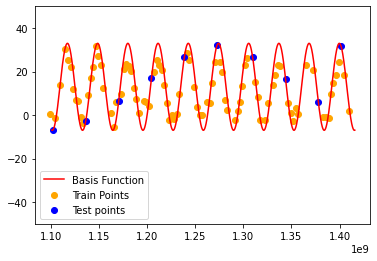

In [157]:
y = basis_func(points,14.4,0.0000002, 349.9899999999991,12.1899)
plt.plot(points,y,color='red',label = 'Basis function')
plt.scatter(predict_data.id,predict_value(predict_data.id),label='Test points',color='blue')
plt.scatter(train_data.id,train_data.value,color='orange',label='Train points')
plt.legend()
plt.ylim(-50,50)
plt.show()
y
y = basis_func(points,20,0.0000002,180.3,13)
plt.plot(points,y,color='red',label='Basis Function')
plt.scatter(X_train,Y_train,color='orange',label ='Train Points')
plt.scatter(predict_data.id,predict_value(predict_data.id),label='Test points',color='blue')
plt.legend()
plt.ylim(-50,50)
plt.show()

In [114]:
y_train_predict=y[3]
rmse_train = np.sqrt(mean_squared_error(train_data.value,y_train_predict))
r2_train = r2_score(train_data.value,y_train_predict)
print(rmse_train)
print(r2_train)

12.13157777688194
-0.44379214813018786


In [ ]:
train_data.

In [42]:
# reading test.csv
predict_data = pd.read_csv('test.csv')
predict_data.head()

#converting date in UNIX timestamp
import time
import datetime
index = 0
for i in predict_data.id:
  predict_data.id[index] = time.mktime(datetime.datetime.strptime(i, "%m/%d/%y").timetuple())
  predict_data.id[index] =  int(predict_data.id[index])
  index+=1




,id
0,1272672000
1,1238544000
2,1377993600
3,1136073600
4,1170288000


In [44]:
def predict_value (x):
  output =[]
  for item in x:
    output.append(20*np.sin((item*0.0000002)+180.3)+13)
  return output

predict_value(predict_data.id)

[32.24206829035438,
 26.66492352219496,
 5.809006887322508,
 -2.5706601595165424,
 6.469394899079166,
 16.814673012595197,
 31.62595931154576,
 16.82635300332905,
 -6.859086815693672,
 26.906674584286215]

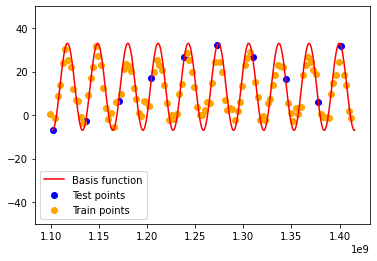

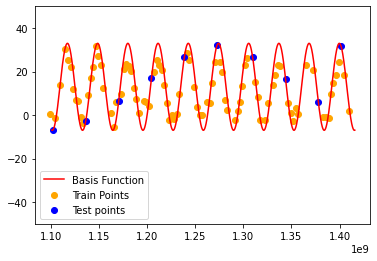

In [156]:
y = basis_func(points,20,0.0000002,180.3,13)
plt.plot(points,y,color='red',label = 'Basis function')
plt.scatter(predict_data.id,predict_value(predict_data.id),label='Test points',color='blue')
plt.scatter(train_data.id,train_data.value,color='orange',label='Train points')
plt.legend()
plt.ylim(-50,50)
plt.show()



In [ ]:
import numpy as np 
  
# curve-fit() function imported from scipy 
from scipy.optimize import curve_fit 
  
from matplotlib import pyplot as plt 
  
# numpy.linspace with the given arguments 
# produce an array of 40 numbers between 0 
# and 10, both inclusive 
x = np.linspace(0, 10, num = 40) 
  
  
# y is another array which stores 3.45 times 
# the sine of (values in x) * 1.334.  
# The random.normal() draws random sample  
# from normal (Gaussian) distribution to make 
# them scatter across the base line 
y =  np.sin(x) 
  
# Test function with coefficients as parameters 
def test(x, a, b): 
    return a * np.sin(b * x) 
  
# curve_fit() function takes the test-function 
# x-data and y-data as argument and returns  
# the coefficients a and b in param and 
# the estimated covariance of param in param_cov 
param, param_cov = curve_fit(test, train_data.id.to_numpy(), train_data.value.to_numpy()) 
  
  
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
plt.plot(train_data.id, train_data.value, 'o', color ='red', label ="data") 
x =train_data.id.to_numpy()
a=[]
for val in x:
  a.append(float(val))
  
# ans stores the new y-data according to  
# the coefficients given by curve-fit() function 
ans =[]
for val in a:
  ans.append( (param[0]*(np.sin(param[1]*val))) )
  
'''Below 4 lines can be un-commented for plotting results  
using matplotlib as shown in the first example. '''
  

plt.plot(train_data.id, ans, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show() 

In [ ]:
train_data.id[1]

In [ ]:
plt.plot_date(train_data.id, train_data.value,color='blue')

In [ ]:

poly_features = PolynomialFeatures(degree=5)
X_train_poly  = poly_features.fit_transform(X_train.to_numpy())
poly_model = LinearRegression()
poly_model.fit(X_train_poly,Y_train)


In [ ]:
y_train_predict = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))


In [ ]:
rmse_train = np.sqrt(mean_squared_error(Y_train,y_train_predict))
r2_train = r2_score(Y_train,y_train_predict)
rmse_test = np.sqrt(mean_squared_error(Y_test,y_test_predict))
r2_test = r2_score(Y_test,y_test_predict)

In [ ]:
print(rmse_train)
print(r2_train)

In [ ]:
plt.scatter(X_train,Y_train,color='blue',label='Data Points')
plt.plot(X_train,y_train_predict,'*',color='r',label='Prediction')
plt.legend()
plt.show()